<a href="https://colab.research.google.com/github/habibi2091/DAA/blob/main/Pertemuan_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy

In [4]:
nterms = int(input("How many terms? "))
n1, n2 = 0, 1
count = 0

if nterms <= 0:
  print("Please enter a positive integer")
elif nterms == 1:
  print("Fibonacci sequence upto", nterms,":")
  print(n1)
else:
  print("Fibonacci sequence: ")
  while count < nterms:
    print(n1)
    nth = n1+n2
    n1 = n2
    n2 = nth
    count += 1

How many terms? 20
Fibonacci sequence: 
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [10]:
def recur_fibo(n):
  if n <= 1:
    return n
  else:
    return(recur_fibo(n-1) + recur_fibo(n-2))

nterms = int(input("How many terms? "))

if nterms <= 0:
  print("Please enter a positive integer")
else:
  print("Fibonacci sequence:")
  for i in range(nterms):
    print(recur_fibo(i))

How many terms? 30
Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229


In [12]:
import random
from itertools import permutations
alltours = permutations

def distance_tour(aTour):
    return sum(distance_points(aTour[i - 1], aTour[i])
        for i in range(len(aTour)))

aCity = complex

def distance_points(first, second):
    return abs(first - second)

def generate_cities(number_of_cities):
    seed = 111;width = 500; height = 300
    random.seed((number_of_cities, seed))
    return frozenset(aCity(random.randint(1, width), random.randint(1, height))
        for c in range(number_of_cities))

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

def visualize_tour(tour, style='bo-'):
  if len(tour) > 1000: plt.figure(fgsize=(15,10))
  start = tour[0:1]
  visualize_segment(tour + start, style)
  visualize_segment(start, 'rD')
def visualize_segment (segment, style='bo-'):
  plt.plot([X(c) for c in segment], [Y(c) for c in segment], style, clip_on=False)
  plt.axis('scaled')
  plt.axis('off')

def X(city): "X axis"; return city.real
def Y(city): "Y axis"; return city.imag

In [16]:
from time import process_time
from collections import Counter
def tsp(algorithm, cities):
  t0 = process_time()
  tour = algorithm(cities)
  t1 = process_time()
  assert Counter(tour) == Counter(cities)
  visualize_tour(tour)
  print("{}:{} cities => tour length {:.0f}(in {:.3f} sec)".format(name(algorithm), len(tour), distance_tour(tour), t1-t0))

def name(algorithm): return algorithm.__name__.replace('_tsp','')

In [18]:
def greedy_algorithm(cities, start=None):
  C = start or first(cities)
  tour = [C]
  univisited = set(cities - {C})
  while univisited:
    C = nearest_neighbor(C, univisited)
    tour.append(C)
    univisited.remove(C)
  return tour

def first(collection): return next(iter(collection))
def nearest_neighbor(A, cities):
  return min(cities, key=lambda C: distance_points(C, A))

greedy_algorithm:10 cities => tour length 1348(in 0.000 sec)


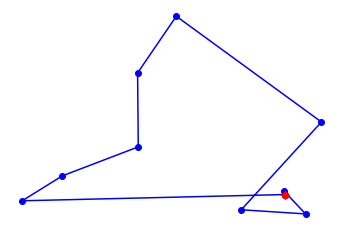

In [20]:

tsp(greedy_algorithm, generate_cities(10))

greedy_algorithm:200 cities => tour length 5354(in 0.008 sec)


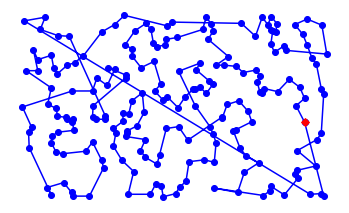

In [21]:
tsp(greedy_algorithm, generate_cities(200))


In [23]:
string = 'HUFFMAN'

class NodeTree(object):
  def __init__(self, left=None, right=None):
    self.left = left
    self.right = right

  def children(self):
    return (self.left, self.right)

  def nodes(self):
    return (self.left, self.right)
  def __str__(self):
    return '%s_%s' % (self.left, self.right)

In [25]:
def huffman_code_tree(node, left=True, binString=''): 
  if type(node) is str:
    return {node: binString}
  (l, r) = node.children()
  d = dict()
  d.update(huffman_code_tree(l, True, binString + '0'))
  d.update(huffman_code_tree(r, False, binString + '1'))
  return d

In [26]:
freq = {}
for c in string:
  if c in freq:
    freq[c] += 1
  else:
    freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

nodes = freq

while len(nodes) > 1:
  (key1, c1) = nodes[-1]
  (key2, c2) = nodes[-2]
  nodes = nodes[:-2]
  node = NodeTree(key1, key2)
  nodes.append((node, c1 + c2))

  nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

huffmanCode = huffman_code_tree(nodes[0][0])

print(' char | Huffman code ')
print('========================')
for (char, frequency) in freq:
  print(' %-4r |%12s' % (char, huffmanCode[char]))

 char | Huffman code 
 'F'  |          11
 'H'  |          00
 'U'  |         011
 'M'  |         010
 'A'  |         101
 'N'  |         100
